In [1]:
import pandas as pd
import time
import os
import keras
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, save_model, load_model

import matplotlib
import matplotlib.pyplot as plt
import itertools

import tensorflow as tf
from tensorflow.keras import regularizers

import seaborn as sns

from sklearn.model_selection import KFold
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [2]:

# Useful Constants

# Output classes to learn how to classify
LABELS = [
    "arching_back",
    "head_banging",
    "kicking_legs",
    "rubbing_eye",
    "stretching",
    "sucking_fingers"
]

DATASET_PATH = "C:\\Users\\Yurtsever\\baby-activity-recog-new\\"

X_train_path = DATASET_PATH + "X_train.txt"
X_test_path = DATASET_PATH + "X_test.txt"

y_train_path = DATASET_PATH + "Y_train.txt"
y_test_path = DATASET_PATH + "Y_test.txt"

n_steps = 20 # 20 timesteps per series

In [3]:
# Load the networks inputs

def load_X(X_path):
    file = open(X_path, 'r')
    X_ = np.array(
        [elem for elem in [
            row.split(',') for row in file
        ]], 
        dtype=np.float32
    )
    file.close()
    #blocks = int(len(X_) / n_steps)
    
    #X_ = np.array(np.split(X_,blocks))

    return X_ 

# Load the networks outputs

def load_y(y_path):
    file = open(y_path, 'r')
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # for 0-based indexing 
    return y_ - 1

X_train = load_X(X_train_path)
X_test = load_X(X_test_path)
#print X_test

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)
# proof that it actually works for the skeptical: replace labelled classes with random classes to train on
#for i in range(len(y_train)):
#    y_train[i] = randint(0, 5)

In [4]:
print(X_train)

[[0.499398 0.246288 0.484095 ... 0.428835 0.491752 0.251768]
 [0.496335 0.246263 0.474909 ... 0.423358 0.491729 0.251717]
 [0.496344 0.240816 0.474917 ... 0.409768 0.485622 0.243557]
 ...
 [0.610051 0.431201 0.623814 ... 0.741836 0.       0.      ]
 [0.611568 0.444827 0.62689  ... 0.749998 0.       0.      ]
 [0.610056 0.450263 0.629945 ... 0.755431 0.       0.      ]]


In [5]:
X_train.shape

(49580, 38)

In [6]:
#scalar = MinMaxScaler()
#X_train = scalar.fit_transform(X_train)

In [7]:
print(X_train)

[[0.499398 0.246288 0.484095 ... 0.428835 0.491752 0.251768]
 [0.496335 0.246263 0.474909 ... 0.423358 0.491729 0.251717]
 [0.496344 0.240816 0.474917 ... 0.409768 0.485622 0.243557]
 ...
 [0.610051 0.431201 0.623814 ... 0.741836 0.       0.      ]
 [0.611568 0.444827 0.62689  ... 0.749998 0.       0.      ]
 [0.610056 0.450263 0.629945 ... 0.755431 0.       0.      ]]


In [8]:
X_train.shape

(49580, 38)

In [9]:
print(y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


## Block creation

In [10]:
blocks = int(len(X_train) / 20)
X_train = np.array(np.split(X_train, blocks))
X_train.shape

(2479, 20, 38)

In [11]:
blocks = int(len(X_test) / 20)
X_test = np.array(np.split(X_test, blocks))
X_test.shape

(597, 20, 38)

In [12]:
y_train.shape

(2479, 1)

In [13]:
X_train.shape

(2479, 20, 38)

In [14]:
print(X_train)

[[[0.499398  0.246288  0.484095  ... 0.428835  0.491752  0.251768 ]
  [0.496335  0.246263  0.474909  ... 0.423358  0.491729  0.251717 ]
  [0.496344  0.240816  0.474917  ... 0.409768  0.485622  0.243557 ]
  ...
  [0.251518  0.197246  0.369348  ... 0.227205  0.332619  0.0664371]
  [0.251524  0.205405  0.372408  ... 0.221772  0.        0.       ]
  [0.24541   0.216293  0.367812  ... 0.210865  0.367808  0.0582648]]

 [[0.499392  0.240824  0.470333  ... 0.398835  0.490208  0.243554 ]
  [0.490221  0.24082   0.474915  ... 0.382511  0.49022   0.243562 ]
  [0.453497  0.268075  0.461151  ... 0.366176  0.49175   0.248991 ]
  ...
  [0.245416  0.17271   0.360153  ... 0.219032  0.360158  0.0528145]
  [0.318849  0.0909612 0.352509  ... 0.164537  0.364748  0.0528145]
  [0.315789  0.0201186 0.350986  ... 0.180879  0.        0.       ]]

 [[0.347914  0.338898  0.444321  ... 0.295319  0.476448  0.219032 ]
  [0.326503  0.30078   0.427494  ... 0.292588  0.464204  0.2054   ]
  [0.401473  0.208126  0.406062 

In [15]:
label_encoder = LabelEncoder()
Y_train = np.array(y_train)
Y_train = label_encoder.fit_transform(y_train)

C:\Users\Yurtsever\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
print(Y_train)

[0 0 0 ... 5 5 5]


In [17]:
label_encoder.classes_

array([0, 1, 2, 3, 4, 5])

In [18]:
Y_train = to_categorical(Y_train)

In [19]:
y_test = to_categorical(y_test)

In [20]:
print(Y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [21]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, y_test), axis=0)

In [22]:
#K-FOLD MODEL

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

input_shape = (20, 38)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [23]:
# K-fold Cross Validation model evaluation
fold_no = 1
best_fold = 1.5

for train, test in kfold.split(inputs, targets):
    
  # Define the model architecture
    model = Sequential()
    model.add(LSTM(32, input_shape=(20, 38), dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) # input_shape=(20, 50)
    #model.add(LSTM(32, input_shape=(20, 38), dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
    #model.add(LSTM(16, input_shape=(20, 38), dropout=0.2, recurrent_dropout=0.2, return_sequences=False, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
    model.add(Dense(32, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(Dense(32, activation='sigmoid'))
    #model.add(Dense(32))
    #model.add(Dense(32))
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    # Define callbacks
    #checkpoint_path = f'./fold_models/{fold_no}'
    #os.mkdir(checkpoint_path)
    
    #keras_callbacks = [
    #ModelCheckpoint(checkpoint_path, monitor='accuracy', save_best_only=True, mode='min')
    #]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=8,
              epochs=40,
              verbose=1)
    
    filepath = f'./fold_models_new/{fold_no}.h5'
    save_model(model, filepath, save_format='h5')

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # take the fold history that has the best loss for our model 
    if (scores[0] < best_fold):
        best_fold_history = history

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
346/346 [==============================] - 3s 5ms/step - loss: 1.7889 - accuracy: 0.2725
Epoch 2/40
346/346 [==============================] - 2s 5ms/step - loss: 1.3472 - accuracy: 0.4693
Epoch 3/40
346/346 [==============================] - 2s 5ms/step - loss: 1.1781 - accuracy: 0.5554
Epoch 4/40
346/346 [==============================] - 2s 5ms/step - loss: 1.0859 - accuracy: 0.6234
Epoch 5/40
346/346 [==============================] - 2s 5ms/step - loss: 0.9904 - accuracy: 0.6879
Epoch 6/40
346/346 [==============================] - 2s 5ms/step - loss: 0.9061 - accuracy: 0.7063
Epoch 7/40
346/346 [==============================] - 2s 4ms/step - loss: 0.8029 - accuracy: 0.7511
Epoch 8/40
346/346 [==============================] - 2s 4ms/step - loss: 0.8004 - accuracy: 0.7453
Epoch 9/40
346/346 [==============================] - 2s 5ms/step - loss: 0.7224 - accuracy: 0.7768
Epo

346/346 [==============================] - 2s 5ms/step - loss: 0.2166 - accuracy: 0.9556
Epoch 37/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2391 - accuracy: 0.9546
Epoch 38/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2583 - accuracy: 0.9447
Epoch 39/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2007 - accuracy: 0.9568
Epoch 40/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2179 - accuracy: 0.9545
Score for fold 4: loss of 0.4407472610473633; accuracy of 91.55844449996948%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/40
346/346 [==============================] - 3s 4ms/step - loss: 1.7107 - accuracy: 0.3285
Epoch 2/40
346/346 [==============================] - 2s 4ms/step - loss: 1.3632 - accuracy: 0.4984
Epoch 3/40
346/346 [==============================] - 2s 5ms/step - loss: 1.2341 - accuracy: 0.5538
Epoch 4/40
346/346 [=============

Epoch 34/40
346/346 [==============================] - 2s 4ms/step - loss: 0.2460 - accuracy: 0.9423
Epoch 35/40
346/346 [==============================] - 2s 4ms/step - loss: 0.2427 - accuracy: 0.9455
Epoch 36/40
346/346 [==============================] - 2s 4ms/step - loss: 0.2574 - accuracy: 0.9374
Epoch 37/40
346/346 [==============================] - 2s 4ms/step - loss: 0.2770 - accuracy: 0.9358
Epoch 38/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2182 - accuracy: 0.9482
Epoch 39/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2252 - accuracy: 0.9532
Epoch 40/40
346/346 [==============================] - 2s 5ms/step - loss: 0.2598 - accuracy: 0.9377
Score for fold 6: loss of 0.2001279890537262; accuracy of 95.45454382896423%
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/40
347/347 [==============================] - 5s 7ms/step - loss: 1.7581 - accuracy: 0.2945
Epoch 2/40
347/347 

347/347 [==============================] - 2s 6ms/step - loss: 0.2843 - accuracy: 0.9296
Epoch 29/40
347/347 [==============================] - 2s 6ms/step - loss: 0.2619 - accuracy: 0.9372
Epoch 30/40
347/347 [==============================] - 2s 7ms/step - loss: 0.2198 - accuracy: 0.9530
Epoch 31/40
347/347 [==============================] - 3s 7ms/step - loss: 0.2450 - accuracy: 0.9402
Epoch 32/40
347/347 [==============================] - 3s 8ms/step - loss: 0.2283 - accuracy: 0.9477
Epoch 33/40
347/347 [==============================] - 3s 8ms/step - loss: 0.2263 - accuracy: 0.9418
Epoch 34/40
347/347 [==============================] - 2s 7ms/step - loss: 0.2289 - accuracy: 0.9486
Epoch 35/40
347/347 [==============================] - 2s 6ms/step - loss: 0.2326 - accuracy: 0.9548
Epoch 36/40
347/347 [==============================] - 2s 7ms/step - loss: 0.2294 - accuracy: 0.9493
Epoch 37/40
347/347 [==============================] - 3s 8ms/step - loss: 0.2126 - accuracy: 0.9532
Ep

dict_keys(['loss', 'accuracy'])


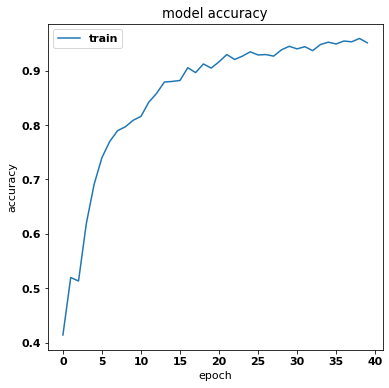

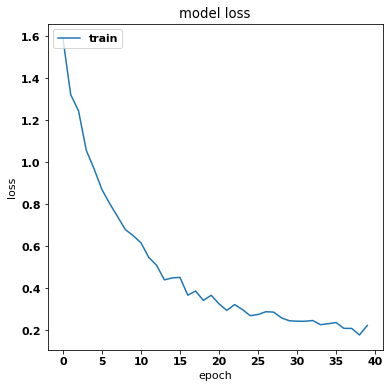

In [24]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


print(best_fold_history.history.keys())
# summarize history for accuracy
plt.plot(best_fold_history.history['accuracy'])
#plt.plot(best_fold_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(best_fold_history.history['loss'])
#plt.plot(best_fold_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_true = y_test
y_pred = model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

C:\Users\Yurtsever\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


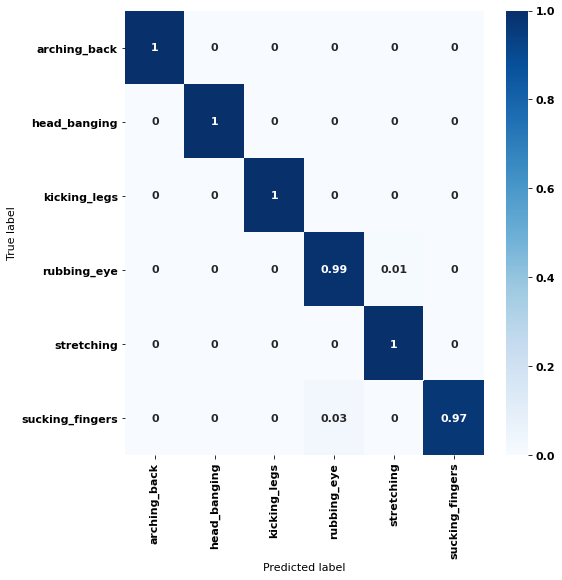

In [26]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
#load selected model...
# FOLD 6 Dene.

loaded_model = load_model('./fold_models_new/6.h5')

loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                9088      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 198       
Total params: 11,398
Trainable params: 11,398
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fit again after selecting best model (fit without train_test split)

# Define callbacks
checkpoint_path = './best_model_new'
os.mkdir(checkpoint_path)

keras_callbacks = [
ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1),
EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
]

# fit final model.
history = loaded_model.fit(X_train, Y_train, validation_data=(X_test, y_test), epochs=40, batch_size=8, callbacks=keras_callbacks)

Epoch 1/40
155/155 [==============================] - 3s 10ms/step - loss: 0.2162 - accuracy: 0.9548 - val_loss: 0.0740 - val_accuracy: 0.9966

Epoch 00001: val_loss improved from inf to 0.07400, saving model to .\best_model_new
INFO:tensorflow:Assets written to: .\best_model_new\assets
Epoch 2/40
155/155 [==============================] - 1s 7ms/step - loss: 0.2075 - accuracy: 0.9556 - val_loss: 0.0757 - val_accuracy: 0.9950

Epoch 00002: val_loss did not improve from 0.07400
Epoch 3/40
155/155 [==============================] - 1s 7ms/step - loss: 0.1973 - accuracy: 0.9601 - val_loss: 0.0712 - val_accuracy: 0.9983

Epoch 00003: val_loss improved from 0.07400 to 0.07115, saving model to .\best_model_new
INFO:tensorflow:Assets written to: .\best_model_new\assets
Epoch 4/40
155/155 [==============================] - 1s 7ms/step - loss: 0.2140 - accuracy: 0.9536 - val_loss: 0.1172 - val_accuracy: 0.9765

Epoch 00004: val_loss did not improve from 0.07115
Epoch 5/40
155/155 [=============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


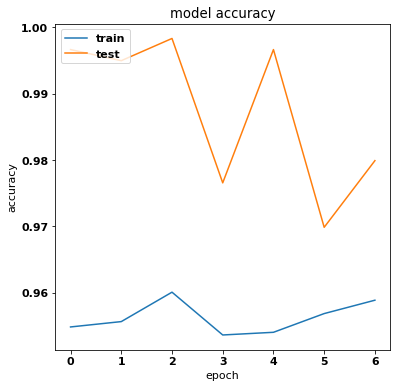

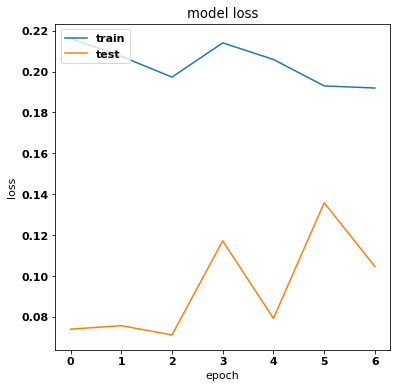

In [30]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_true = y_test
y_pred = loaded_model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]
#classes=["head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

C:\Users\Yurtsever\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


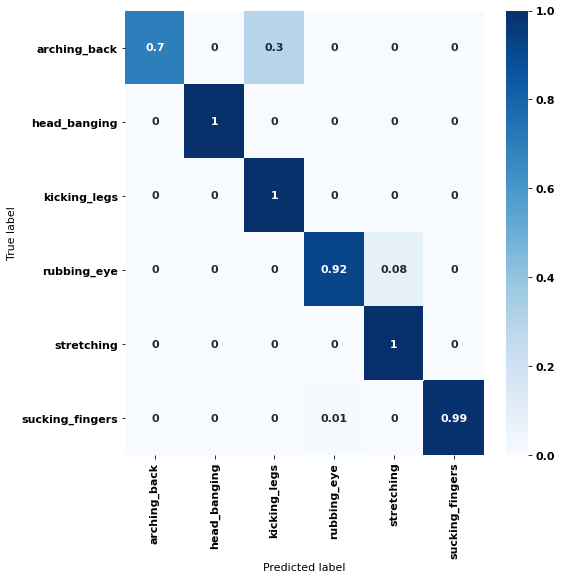

In [32]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))

In [34]:
print(confusion_matrix)

[[ 10   0   0   0   0   0]
 [  0  28   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   0  87   1   0]
 [  0   0   0   0  51   0]
 [  0   0   0   7   0 249]]


In [35]:
print(y_test)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
